In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13
### <u>IMPORTANT NOTE:</u> All students must complete HW5 - this homework grade cannot be dropped as part of the lowest homework grade drop policy.

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import os
import sys

sys.path.append(os.path.join(os.path.abspath(".."), "code"))

import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler)
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
!pip install lightgbm
from lightgbm.sklearn import LGBMClassifier
import random
%matplotlib inline
pd.set_option("display.max_colwidth", 200)
DATA_DIR = "../data/"

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

- Choice : option 1\
This dataset contains information about credit card clients, including personal details like gender, education level, marital status, and age, as well as financial data such as credit limits, payment history, bill statements, and previous payments.
- Here’s a breakdown of some key features:

LIMIT_BAL refers to the total credit limit in NT dollars.\
PAY_0 to PAY_6 indicate the repayment status from April to September 2005, where values range from -2 (no consumption) to positive numbers indicating payment delays.\
BILL_AMT1 to BILL_AMT6 show the amount of the bill statement for each of those months.\
PAY_AMT1 to PAY_AMT6 represent the amounts of payments made in the same period.\
The goal is to predict whether a client will default on their credit card payments. To do this, we can use supervised machine learning models, leveraging the dataset's features. However, since there are many variables, a good first step would be to filter out irrelevant features or identify the ones that have the strongest impact on predicting default risk.

In [3]:
creditcard_df = pd.read_csv("data/UCI_Credit_Card.csv")
creditcard_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(creditcard_df,test_size=0.3,random_state=123)
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

- 1. perform EDA on the training set.

In [5]:
creditcard_summary = train_df.describe(include='all')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   2100

In [7]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
numeric_features = ["LIMIT_BAL", "AGE",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
categorical_features = ["EDUCATION","MARRIAGE"]
binary_features = ["SEX"]
drop_features = ["ID"] # Nothing is dropped

target = "default.payment.next.month"

- 2. summary statistics and visualization that is useful, and explaination.\
     _The mean of age is 35.5 years, that shows the average age among all collected credit card clients._\
     _The mean of credit limit is about $167880, indicates the average credit limit among the clients, but the value here shows a right-skewed distribution so the median will show things better._\
     _There are no null value among all data, so no null value need to be replaced, no imputation needed._\
     _The numeric features shows a right-skewed distribution, that means that we need to apply transformation to make the data normal distributed._\
     _The histogram of 'LIMIT_BAL' shows a right-skewed distribution, and it indicates that most clients have lower credit limits._\
     _The bar plot below show the proportion of credit cards default or not, it shows that the number of defaults are rarer than the number of non-defaults, which is a large class imbalance here on target value. We will use 'class_weight=balanced' on models._

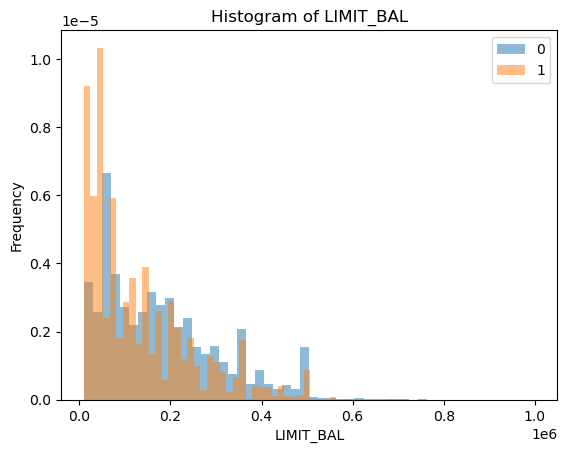

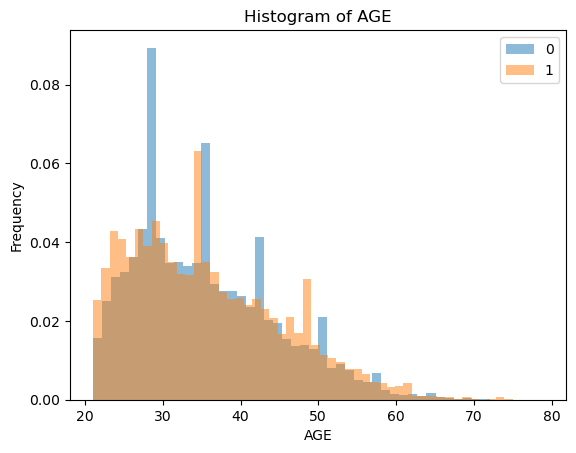

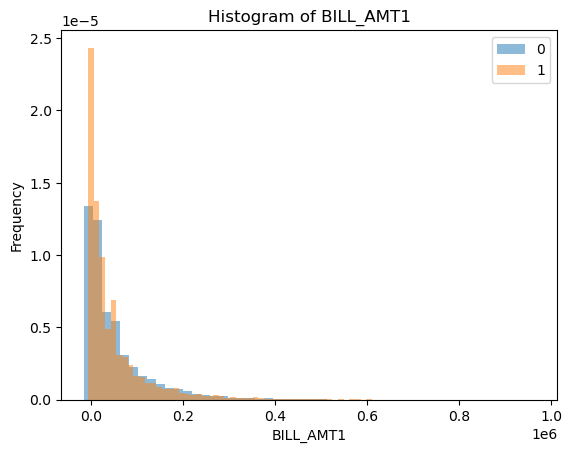

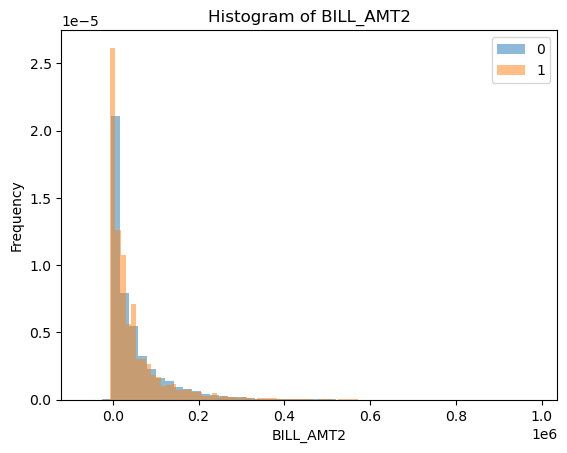

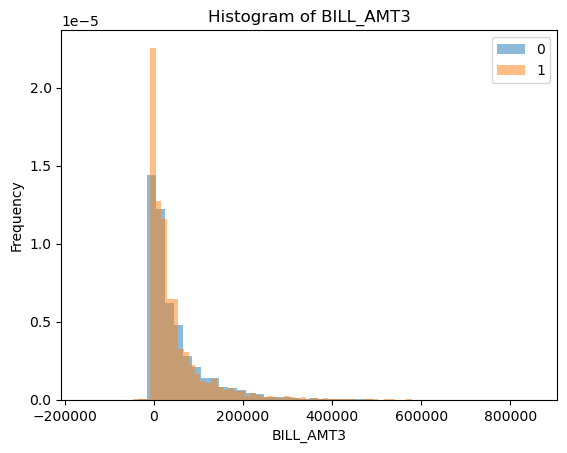

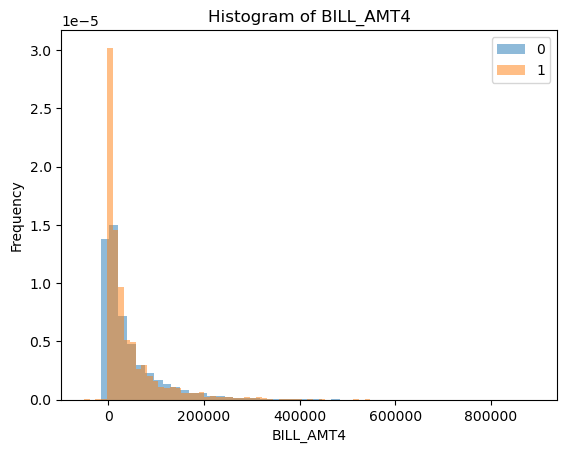

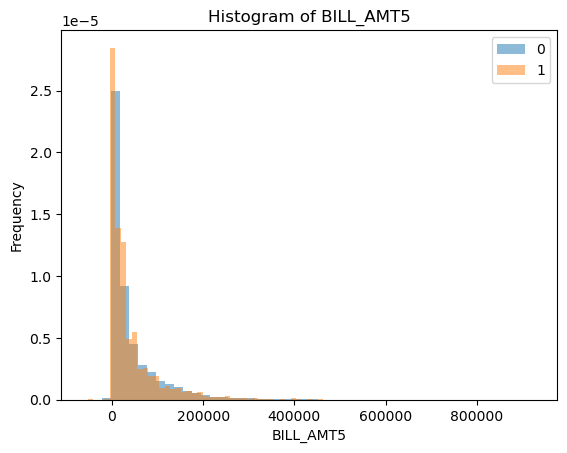

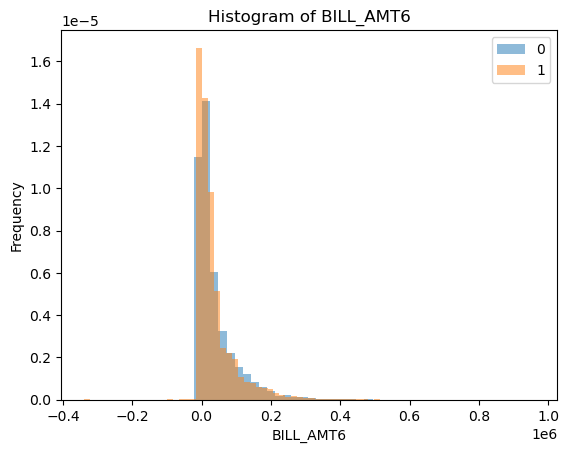

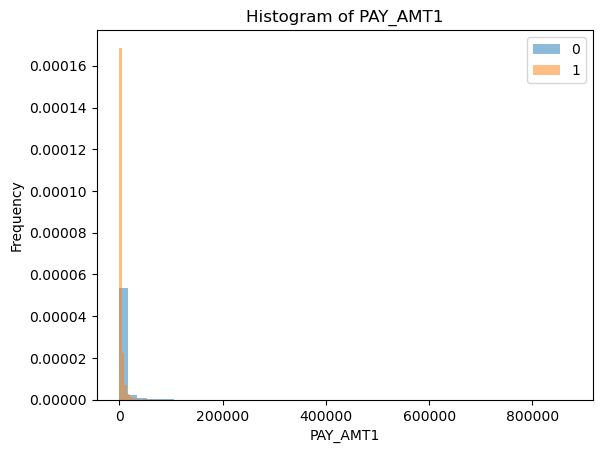

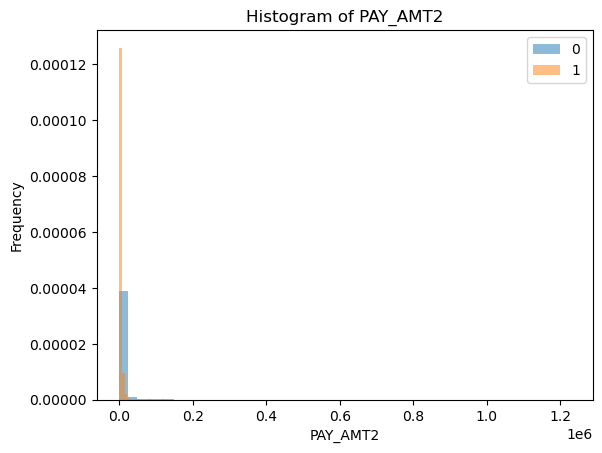

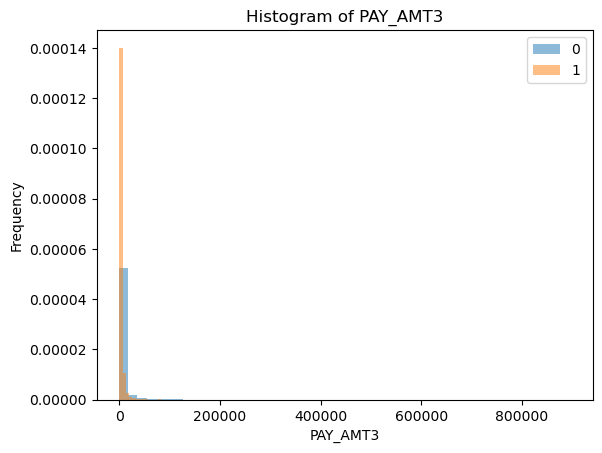

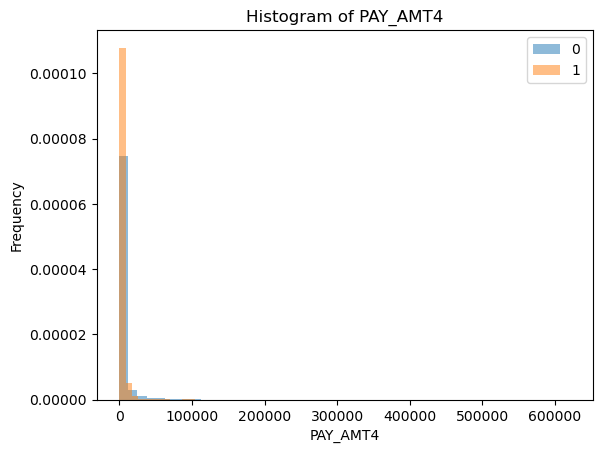

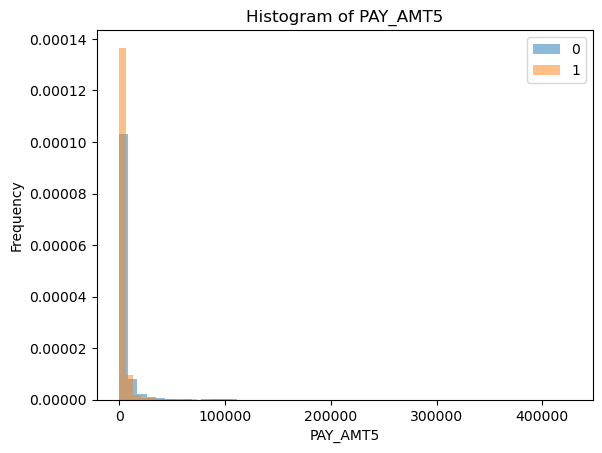

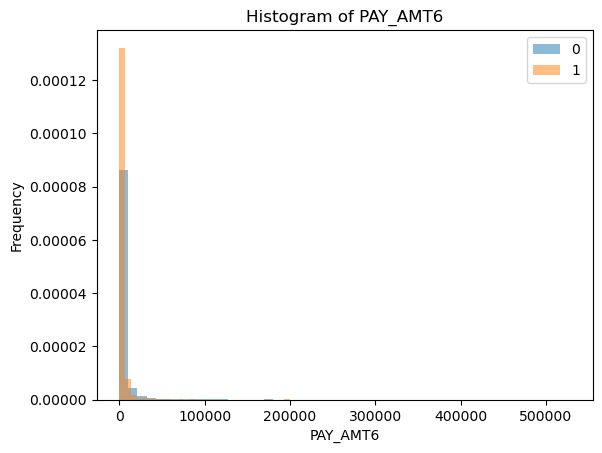

In [9]:
feat = ["LIMIT_BAL", "AGE",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
for i in range(len(feat)):
    train_df.groupby("default.payment.next.month")[feat[i]].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title = "Histogram of " + feat[i]);
    plt.xlabel(feat[i])
    plt.show()

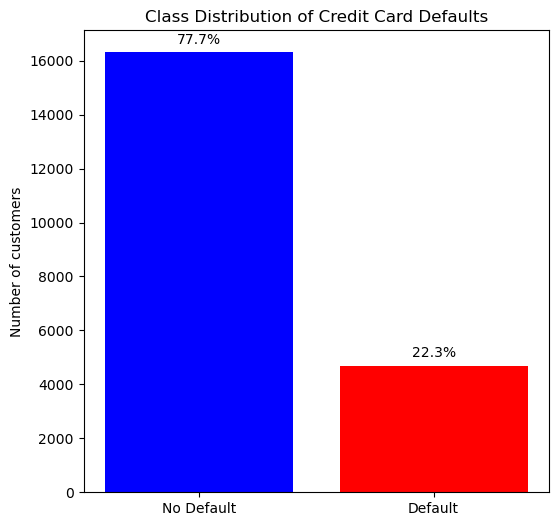

In [10]:
class_counts = train_df["default.payment.next.month"].value_counts()
plt.figure(figsize=(6, 6))
labels = ["No Default", "Default"]
plt.bar(labels, class_counts.values, color=["blue", "red"])
plt.title("Class Distribution of Credit Card Defaults")
plt.ylabel("Number of customers")
values = class_counts.values
total = sum(values)
for i, value in enumerate(values):
    percent = value / total * 100
    plt.text(i, value + total * 0.01, f"{percent:.1f}%", ha="center", va="bottom")
plt.show()

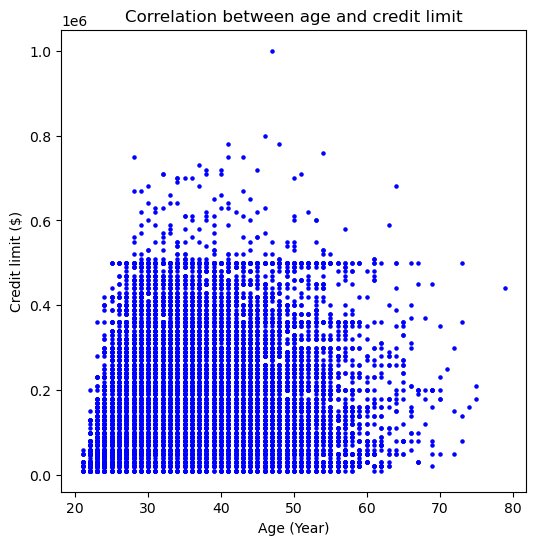

In [11]:
xaxis = train_df['AGE']
yaxis = train_df['LIMIT_BAL']
plt.figure(figsize=(6, 6))
plt.scatter(xaxis, yaxis, color='blue', marker='o', s=5)
plt.xlabel("Age (Year)")
plt.ylabel("Credit limit ($)")
plt.title("Correlation between age and credit limit")
plt.show()

- 3. Summarize the initial observations about the data.\
    The value distribution of credit limits shows that most clients have limits below $200,000, so high limits are rare.\
    Since the dataset has no missing values, that makes our preprocessing progress easier.\
    There's no evidence showing that older client will have higher credit limit by the scatter plot, whereas, middle-aged client seem to have highest credit limit.\
    The average age 35.5 shows that the clients are generally middle-aged, and no individuals are below 20.

- 4. Pick appropriate metric/metrics for assessment.\
     I will pick the **recall** as the appropriate metric since we need to minimizes the false negatives (actual defaults predicted as non-defaults). By the bar plot above, we know that our target value seem to be imbalanced with less negative class data points.\
     By minimizes the false negatives, our model can do well on recognizing as many true default cases, this will decrease finance risk.\
     Minimized the false nagtives means **maximizes the recall**, our model can do well in cature high finance risk scenarios.

In [12]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [13]:
train_df['MAX_PAY_DELAY'] = train_df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].max(axis=1)
train_df['AVG_PAY_DELAY'] = train_df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis=1)
train_df['NUM_MISSED_PAYMENTS'] = (train_df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']] > 0).sum(axis=1)

train_df['TOTAL_BILL_AMT'] = train_df[[f'BILL_AMT{i}' for i in range(1,7)]].sum(axis=1)
train_df['TOTAL_PAY_AMT'] = train_df[[f'PAY_AMT{i}' for i in range(1,7)]].sum(axis=1)
train_df['PAYMENT_RATIO'] = train_df['TOTAL_PAY_AMT'] / (train_df['TOTAL_BILL_AMT'] + 1)  # +1 to avoid division by zero

train_df['AGE_CREDIT_RATIO'] = train_df['AGE'] / (train_df['LIMIT_BAL'] + 1)


test_df['MAX_PAY_DELAY'] = test_df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].max(axis=1)
test_df['AVG_PAY_DELAY'] = test_df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis=1)
test_df['NUM_MISSED_PAYMENTS'] = (test_df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']] > 0).sum(axis=1)

test_df['TOTAL_BILL_AMT'] = test_df[[f'BILL_AMT{i}' for i in range(1,7)]].sum(axis=1)
test_df['TOTAL_PAY_AMT'] = test_df[[f'PAY_AMT{i}' for i in range(1,7)]].sum(axis=1)
test_df['PAYMENT_RATIO'] = test_df['TOTAL_PAY_AMT'] / (test_df['TOTAL_BILL_AMT'] + 1)

test_df['AGE_CREDIT_RATIO'] = test_df['AGE'] / (test_df['LIMIT_BAL'] + 1)
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT5,PAY_AMT6,default.payment.next.month,MAX_PAY_DELAY,AVG_PAY_DELAY,NUM_MISSED_PAYMENTS,TOTAL_BILL_AMT,TOTAL_PAY_AMT,PAYMENT_RATIO,AGE_CREDIT_RATIO
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,0.0,7013.0,0,0,0.0,0,119213.0,21031.0,0.176414,0.000112
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,15000.0,51663.0,0,0,-0.5,0,528826.0,287726.0,0.544083,0.000068
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,0.0,0.0,0,-2,-2.0,0,-108.0,0.0,-0.000000,0.000275
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,2005.0,1702.0,0,0,0.0,0,530682.0,20136.0,0.037944,0.000250
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,1000.0,1500.0,0,2,0.5,2,205081.0,6600.0,0.032182,0.001080


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [14]:
numeric_features = [
    "LIMIT_BAL", "AGE",
    "TOTAL_BILL_AMT", "TOTAL_PAY_AMT", "PAYMENT_RATIO",  # engineered
    "MAX_PAY_DELAY", "AVG_PAY_DELAY", "NUM_MISSED_PAYMENTS",  # engineered
    "AGE_CREDIT_RATIO",
    "PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"
]
categorical_features = ["EDUCATION", "MARRIAGE"]

binary_features = ["SEX"]

drop_features = ["ID","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

target = "default.payment.next.month"

In [15]:
numeric_transformer = StandardScaler()
binary_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary',dtype = int)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary',dtype = int)
)

In [16]:
ct = make_column_transformer(
    (numeric_transformer, numeric_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ('drop', drop_features),
)
ct

,transformers,"[('standardscaler', ...), ('onehotencoder', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [17]:
X_train = train_df.drop(["default.payment.next.month"], axis=1)
y_train = train_df["default.payment.next.month"]
X_test = test_df.drop(["default.payment.next.month"], axis=1)
y_test = test_df["default.payment.next.month"]

In [18]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

cv_results = cross_validate(dummy_clf, X_train, y_train, scoring = "recall", return_train_score=True)

y_pred = dummy_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='binary', zero_division=1)

print("Cross-validation recall:", cv_results['test_score'].mean())

results = pd.DataFrame(cv_results).mean()
results

Cross-validation recall: 0.0


fit_time       0.004059
score_time     0.002745
test_score     0.000000
train_score    0.000000
dtype: float64

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
import pandas as pd

model = DummyClassifier()
pipe_dummy = make_pipeline(ct, model)
scores = cross_validate(pipe_dummy, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.027245,0.007934,0.776905,0.776726
1,0.021408,0.006494,0.776905,0.776726
2,0.020161,0.006505,0.776667,0.776786
3,0.021878,0.005947,0.776667,0.776786
4,0.020570,0.006250,0.776667,0.776786


**Report the results**\
The result is 77% for both test and train score, which is the ratio of the class imbalance we mentioned before, so the dummy model is not doing well, it's effected by the class imbalance in our original data.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Summary is below_

In [20]:
pipeline_log = make_pipeline(ct, LogisticRegression())

param_grid_log = {
    "logisticregression__C": np.logspace(-4,3,20),
    "logisticregression__class_weight": [None,'balanced']}

from sklearn.metrics import make_scorer, recall_score
recall_scorer = make_scorer(recall_score)
random_search_log = RandomizedSearchCV(pipeline_log,
                                   param_distributions = param_grid_log,
                                   n_iter=15,
                                   scoring=recall_scorer,
                                   refit='recall',
                                   n_jobs=-1, return_train_score=True,
                                   random_state=123)

In [21]:
random_search_log.fit(X_train,y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,estimator,Pipeline(step...egression())])
,param_distributions,"{'logisticregression__C': array([1.0000...00000000e+03]), 'logisticregression__class_weight': [None, 'balanced']}"
,n_iter,15
,scoring,make_scorer(r...hod='predict')
,n_jobs,-1
,refit,'recall'
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,123
,error_score,nan


In [22]:
log_df_sorted = pd.DataFrame(random_search_log.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        'param_logisticregression__class_weight',
        'param_logisticregression__C'
    ]
].sort_values(
    by=["mean_test_score"],  
    ascending=False  
).T

log_df_sorted

,13,4,11,6,5,8,7,3,9,12,14,2,1,10,0
mean_test_score,0.630541,0.629475,0.62841,0.628196,0.628196,0.628196,0.572736,0.307595,0.306742,0.306742,0.306315,0.297356,0.290532,0.279013,0.255336
std_test_score,0.01034,0.008781,0.007608,0.008256,0.00793,0.008267,0.012448,0.008034,0.008769,0.008363,0.008848,0.011608,0.013468,0.015052,0.015482
mean_fit_time,0.097406,0.118505,0.25195,0.232901,0.166449,0.168476,0.088183,0.182922,0.23119,0.241014,0.170818,0.158659,0.143941,0.110093,0.1039
param_logisticregression__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,None,None,None,None,None,None,None,None
param_logisticregression__C,0.001274,0.000546,428.13324,1.128838,0.006952,0.016238,0.0001,1000.0,0.483293,2.636651,0.206914,0.016238,0.006952,0.002976,0.001274


**Summarize the results:**\
The results shows that adjusting for class imbalance and fine-tuning regularization are key for optimizing model recall and stability:\
The best-performing configurations achieved a recall score of `0.631` with `class_weight='balanced'` and a regularization parameter `C=0.001274`. Followed closely by `C=0.000546` with `0.6295`.\
All top-performing models (with recall above 0.628) used `class_weight='balanced'`, confirming its importance for handling class imbalance effectively.\
Models with `class_weight=None` generally performed worse, emphasizing the importance of compensating for data imbalance.\
The most effective regularization strengths (C values) were in the lower range (e.g., 0.001–0.01), suggesting that stronger regularization helps improve recall.\
Standard deviations across folds were relatively low for top models, indicating consistent performance.

Overall, to maximize recall on this imbalanced dataset, it's recommended to use `class_weight='balanced'` and tune C within a log-scale range favoring smaller values (e.g., `0.0005` to`0.01`).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

**Model 1: Random Forest (Tree-based ensemble model)**

In [23]:
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, accuracy_score
pipe_rf = make_pipeline(
    ct, RandomForestClassifier(class_weight="balanced", random_state=123)
)
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1'
}

scores_rf = cross_validate(
    pipe_rf,
    X_train,
    y_train,
    scoring=scoring,
    return_train_score=True,
    cv=5
)

pd.DataFrame(scores_rf)

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
0,3.395885,0.096682,0.808095,0.999345,0.344717,1.000000,0.627184,0.997076,0.444904,0.998536
1,3.354601,0.094139,0.812381,0.999405,0.361793,1.000000,0.640832,0.997341,0.462483,0.998669
2,3.382687,0.095348,0.818810,0.999286,0.361407,0.999733,0.676647,0.997074,0.471161,0.998402
3,3.304773,0.093954,0.818095,0.999048,0.372068,0.998667,0.666031,0.997071,0.477428,0.997868
4,3.274085,0.093516,0.809048,0.999464,0.346482,0.999467,0.632296,0.998136,0.447658,0.998801


The Training performance is very high: With Accuracy: ~99.9%, Recall: ~99.96%, Precision: ~99.7%, F1-score: ~99.8%

This indicates the model fits the training data extremely well, possibly too well that it **overfits** the model.

Test performance is notably lower:\
Accuracy: ~81.3% — overall prediction correctness is decent.\
Recall: ~35.7% — the model only identifies about 1 in 3 actual positive cases.\
Precision: ~64.9% — when the model predicts positive, it’s correct about 65% of the time.\
F1-score: ~46.1% — balance between precision and recall is moderate.

- The random forest model `overfits` the training data that it performs excellently on training but poorly generalizes to unseen data, especially in terms of recall. Maybe we can try tuning hyperparameters further with recall-focused scoring to reduce the overfitting.

In [24]:
print("\nMean scores:")
print(pd.DataFrame(scores_rf).mean()[[
    'train_accuracy', 'test_accuracy',
    'train_recall', 'test_recall',
    'train_precision', 'test_precision',
    'train_f1', 'test_f1'
]])


Mean scores:
train_accuracy     0.999310
test_accuracy      0.813286
train_recall       0.999573
test_recall        0.357293
train_precision    0.997340
test_precision     0.648598
train_f1           0.998455
test_f1            0.460727
dtype: float64


**Model 2: K-nearest neighbors**

In [25]:
pipe_knn = make_pipeline(
    ct, KNeighborsClassifier())

scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1'
}

scores_knn = cross_validate(
    pipe_knn,
    X_train,
    y_train,
    scoring=scoring,
    return_train_score=True,
    cv=5
)

pd.DataFrame(scores_knn)

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
0,0.020707,0.260544,0.789762,0.842560,0.366062,0.479339,0.542722,0.722088,0.437221,0.576190
1,0.035888,0.297785,0.793333,0.845119,0.360726,0.479872,0.556837,0.734394,0.437824,0.580458
2,0.028300,0.237372,0.800000,0.841250,0.373134,0.470400,0.581395,0.721472,0.454545,0.569492
3,0.030517,0.243697,0.797619,0.843512,0.395522,0.477333,0.567278,0.727938,0.466080,0.576582
4,0.026550,0.240676,0.798095,0.842857,0.356077,0.474400,0.577855,0.726716,0.440633,0.574056


In [26]:
print("\nMean scores:")
print(pd.DataFrame(scores_knn).mean()[[
    'train_accuracy', 'test_accuracy',
    'train_recall', 'test_recall',
    'train_precision', 'test_precision',
    'train_f1', 'test_f1'
]])


Mean scores:
train_accuracy     0.843060
test_accuracy      0.795762
train_recall       0.476269
test_recall        0.370304
train_precision    0.726522
test_precision     0.565217
train_f1           0.575356
test_f1            0.447261
dtype: float64


**Summary and results for KNN model:**\
Training performance: With Accuracy: ~84.3% — good overall performance on the training set. Recall: ~47.6% — identifies nearly half of the actual positive cases. Precision: ~72.7% — when it predicts positive, it's correct nearly three-quarters of the time. F1-score: ~57.5% — decent balance between precision and recall.

Test performance:\
Accuracy: ~79.6% — slightly lower than training accuracy.\
Recall: ~37.0% — lower than training recall, indicating reduced ability to detect positives on unseen data.\
Precision: ~56.5% — moderate, showing over half of positive predictions are correct.\
F1-score: ~44.7% — reflects a moderate balance between recall and precision.

The `KNN` model generalizes better than Random Forest in terms of overfitting, but it still struggles with recall on the test set.\
Compared to Random Forest, it's `less overfit`. However, recall is still quite low, which is problematic for imbalanced classification tasks where identifying positives is critical.

**Model 3: LightBGM model**

In [27]:
pipe_lgbm = make_pipeline(ct, LGBMClassifier(random_state=123, verbose=-1))

In [28]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names, but LGBMClassifier was fitted with feature names")

scores_lgbm = cross_validate(
    pipe_lgbm,
    X_train,
    y_train,
    scoring=scoring,
    return_train_score=True,
    cv=5
)

pd.DataFrame(scores_lgbm)

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
0,0.155668,0.026795,0.811905,0.853929,0.367129,0.454812,0.635860,0.806619,0.465494,0.581657
1,0.145565,0.029369,0.816190,0.849048,0.369264,0.441482,0.656546,0.789700,0.472678,0.566347
2,0.146253,0.024667,0.820238,0.850536,0.366738,0.441333,0.681188,0.799131,0.476784,0.568631
3,0.145872,0.024897,0.822143,0.849048,0.386994,0.444000,0.678505,0.786862,0.492872,0.567678
4,0.153295,0.024986,0.815952,0.852500,0.360341,0.442400,0.661448,0.810850,0.466529,0.572464


In [29]:
print("\nMean scores:")
print(pd.DataFrame(scores_lgbm).mean()[[
    'train_accuracy', 'test_accuracy',
    'train_recall', 'test_recall',
    'train_precision', 'test_precision',
    'train_f1', 'test_f1'
]])


Mean scores:
train_accuracy     0.851012
test_accuracy      0.817286
train_recall       0.444806
test_recall        0.370093
train_precision    0.798632
test_precision     0.662709
train_f1           0.571355
test_f1            0.474871
dtype: float64


**Summary and results**\
The model shows moderate accuracy on both training (85.1%) and test data (81.7%), indicating decent overall correctness.
- Recall is relatively low on both training (44.5%) and test sets (37.0%), suggesting the model misses many positive cases (i.e., it has limited sensitivity).
- Precision is higher (79.8% train, 66.3% test), meaning when the model predicts a positive, it’s often correct, though there is some drop on test data.
- The F1 scores (harmonic mean of precision and recall) are moderate (57.1% train, 47.4% test), reflecting a balance but still room for improvement, especially in recall.

Overall, the model appears not to overfitts that much as Random Forest, with the biggest challenge being improving recall on unseen data.

We will select from KNN model and LightGBM model for future prediction since these performs better. But we will use KNN first. Also, we will focus on the **Recall** score next due to the class imbalance.\
**Note: Since KNN model is not easy to interpret, and LightGBM can do better on interpretation, we will use LightGBM instead on the future interpretation and feature importances step (step 11)**

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

**Feature selection summary**\
After applied `RFECV` using a logistic regression estimator, the RFECV process selected 12 out of 27 total features, including both raw and engineered features such as:\
Selected features: `['standardscaler__TOTAL_PAY_AMT', 'standardscaler__MAX_PAY_DELAY', 'standardscaler__NUM_MISSED_PAYMENTS', 'standardscaler__PAY_0', 'standardscaler__PAY_4', 'pipeline__EDUCATION_0', 'pipeline__EDUCATION_1', 'pipeline__EDUCATION_2', 'pipeline__EDUCATION_3', 'pipeline__EDUCATION_4', 'pipeline__EDUCATION_5', 'pipeline__MARRIAGE_0']`

Since the selected features didn't include all transformed columns of sex, marriage, amd didn't include AGE, we are going to drop MERRIAGE, AGE, SEX.\
These are what we are going to select:\
`numeric_feat = ['LIMIT_BAL','TOTAL_BILL_AMT','TOTAL_PAY_AMT', 'PAYMENT_RATIO', 'MAX_PAY_DELAY', 'AVG_PAY_DELAY',
                'NUM_MISSED_PAYMENTS', 'AGE_CREDIT_RATIO', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',]`\
`categorical_feat = ['EDUCATION']`\
`drop_features = ['ID', 'MARRIAGE', 'SEX', 'AGE']`

- Results summary:\
  KNN and LightGBM saw modest improvements or maintained validation recall, suggesting feature selection might have helped reduce noise or redundancy.\
Random Forest's performance slightly declined, but not dramatically.\
Therefore,I'm going to keep feature selection for KNN and LightGBM in the pipeline.Whereas, for Random Forest, I consider dropping feature selection.

In [30]:
# Base estimator
estimator = LogisticRegression(C=100,max_iter=1000)

# RFECV setup
rfecv = RFECV(
    estimator=estimator,
    step=1,
    cv=20,
    scoring='recall',
    n_jobs=-1
)

pipeline_fs = Pipeline([
    ('preprocessing', ct),
    ('feature_selection', rfecv),
    ('classifier', estimator)
])

pipeline_fs.fit(X_train, y_train)

feature_names = pipeline_fs.named_steps['preprocessing'].get_feature_names_out()

# Get selected features
selected_mask = rfecv.support_
selected_features = feature_names[selected_mask]

print("Selected features:\n", list(selected_features))

Selected features:
 ['standardscaler__TOTAL_PAY_AMT', 'standardscaler__MAX_PAY_DELAY', 'standardscaler__NUM_MISSED_PAYMENTS', 'standardscaler__PAY_0', 'standardscaler__PAY_4', 'pipeline__EDUCATION_0', 'pipeline__EDUCATION_1', 'pipeline__EDUCATION_2', 'pipeline__EDUCATION_3', 'pipeline__EDUCATION_4', 'pipeline__EDUCATION_5', 'pipeline__MARRIAGE_0']


In [31]:
numeric_feat = [
    "LIMIT_BAL",
    "TOTAL_BILL_AMT", "TOTAL_PAY_AMT", "PAYMENT_RATIO",  # engineered
    "MAX_PAY_DELAY", "AVG_PAY_DELAY", "NUM_MISSED_PAYMENTS",  # engineered
    "AGE_CREDIT_RATIO",
    "PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"
]
categorical_feat = ["EDUCATION"]
drop_feat = ["ID","AGE","SEX","MARRIAGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]


In [32]:
ct_modified = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_feat),
    (make_pipeline(OneHotEncoder()),categorical_feat),
    ('drop', drop_feat)  
    )

pipe_rf = make_pipeline(
    ct_modified, RandomForestClassifier(class_weight="balanced", random_state=123)
)
pipe_knn = make_pipeline(
    ct_modified, KNeighborsClassifier()
)
pipe_lgbm = make_pipeline(
    ct_modified, LGBMClassifier(random_state=123, verbose=-1)
)

classifiers = {
    "Random Forest": pipe_rf,
    'K-Nearest Neighbors': pipe_knn,
    "LightGBM": pipe_lgbm,
}

results = {}
for name, model in classifiers.items():
    results[name] = cross_validate(
        model, X_train, y_train, return_train_score=True, scoring=recall_scorer
    )

results_df = pd.DataFrame(results).T


formatted_results = {}
for name, result in results.items():
    formatted_results[name] = {
        "Train Time (s)": f"{np.mean(result['score_time']):.4f} ± {np.std(result['score_time']):.4f}",
        "Test Time (s)": f"{np.mean(result['fit_time']):.4f} ± {np.std(result['fit_time']):.4f}",
        "Train Recall": f"{np.mean(result['train_score']):.4f} ± {np.std(result['train_score']):.4f}",
        "Validation Recall": f"{np.mean(result['test_score']):.4f} ± {np.std(result['test_score']):.4f}",
    }
formatted_results_df = pd.DataFrame(formatted_results).T
formatted_results_df

,Train Time (s),Test Time (s),Train Recall,Validation Recall
Random Forest,0.0884 ± 0.0014,3.2000 ± 0.0519,0.9994 ± 0.0005,0.3554 ± 0.0115
K-Nearest Neighbors,0.2013 ± 0.0202,0.0171 ± 0.0019,0.4868 ± 0.0066,0.3750 ± 0.0097
LightGBM,0.0168 ± 0.0010,0.1401 ± 0.0041,0.4378 ± 0.0078,0.3665 ± 0.0175


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

**Hyperparameter Optimization with Random Forest model**

After using RandomizedSearchCV method, tuned hyper parameters max_depth from 1-100, n_estimators from 3-20.
- The best results happens when `max_depth = 1`, `n_estimators = 3`, with mean test recall 0.6495, and pretty low standard deviation, mean fit time: ~0.035 seconds.

Shallow trees (max_depth=1,5) consistently yielded the best recall scores in this randomized search.\
More trees didn’t consistently improve recall once depth was fixed at 5.\
Training time remained very low across configurations, making this model efficient.
Performance gain from tuning was marginal, but the best config achieved about 1.6% higher recall than the next best.

In [33]:
param_grid_rf = {
    "randomforestclassifier__max_depth": [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "randomforestclassifier__n_estimators":[3, 5, 10, 15, 20]}

random_search_rfc = RandomizedSearchCV(pipe_rf,                                    
                  param_distributions = param_grid_rf, 
                  n_iter=50,
                  scoring= recall_scorer,
                  refit='recall',
                  return_train_score=True,random_state=123)

random_search_rfc.fit(X_train, y_train)
rfc_df_sorted = pd.DataFrame(random_search_rfc.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        'param_randomforestclassifier__max_depth',
        'param_randomforestclassifier__n_estimators'
    ]
].sort_values(
    by=["mean_test_score"], 
    ascending=False
).T

rfc_df_sorted

,25,15,37,16,26,32,19,38,47,17,...,40,21,0,28,30,29,5,48,49,11
mean_test_score,0.649526,0.649526,0.647821,0.643763,0.642061,0.634169,0.631183,0.624771,0.623290,0.573804,...,0.342572,0.342572,0.342146,0.339800,0.329773,0.329773,0.329773,0.329773,0.329773,0.325509
std_test_score,0.009305,0.009305,0.009773,0.018731,0.008893,0.011190,0.008735,0.029814,0.010059,0.020306,...,0.010519,0.010519,0.010386,0.010061,0.011377,0.011377,0.011377,0.011377,0.011377,0.008145
mean_fit_time,0.040926,0.030610,0.088412,0.050966,0.076559,0.131928,0.185589,0.107737,0.245110,0.073269,...,0.644669,0.645086,0.656350,0.650162,0.337464,0.338505,0.331918,0.336707,0.337609,0.334681
param_randomforestclassifier__max_depth,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,10.000000,...,100.000000,70.000000,30.000000,40.000000,60.000000,100.000000,90.000000,80.000000,50.000000,40.000000
param_randomforestclassifier__n_estimators,5.000000,3.000000,15.000000,3.000000,5.000000,10.000000,15.000000,20.000000,20.000000,3.000000,...,20.000000,20.000000,20.000000,20.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**Hyperparameter Optimization with KNN model**(below)\
After using RandomizedSearchCV method, tuned hyper parameters n_neighbors from 1-200, weights with `'distance'` and `'uniform'`,
- The best results happens when `n_neighbors = 1`, `weights = 'distance'`, with mean test recall 0.40081, and pretty low standard deviation, mean fit time: ~0.019 seconds.\
Best performance was achieved with very low n_neighbors (1) and distance-based weighting, suggesting local neighbors carry stronger signals than averaging larger neighborhoods.\
Increasing n_neighbors beyond 25 led to a noticeable drop in recall. Also, all configurations had low training times, typically under 0.025 seconds.

In [34]:
param_grid_knn = {
    "kneighborsclassifier__n_neighbors": [1,2,3,4, 5, 10, 25, 50, 100, 200],
    "kneighborsclassifier__weights": ['distance', "uniform"]}

random_search_knn = RandomizedSearchCV(pipe_knn,                                    
                  param_distributions = param_grid_knn, 
                  n_iter=10,
                  scoring=recall_scorer,
                  refit='recall',
                  return_train_score=True,random_state=123)

random_search_knn.fit(X_train, y_train)

knn_df_sorted = pd.DataFrame(random_search_knn.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        'param_kneighborsclassifier__n_neighbors',
        'param_kneighborsclassifier__weights'
    ]
].sort_values(
    by=["mean_test_score"],
    ascending=False
).T

knn_df_sorted

,8,1,2,4,7,0,3,9,6,5
mean_test_score,0.40081,0.390784,0.390143,0.380542,0.379906,0.37564,0.358148,0.354093,0.352176,0.278369
std_test_score,0.008833,0.01089,0.011199,0.010371,0.00944,0.005805,0.013475,0.010061,0.013255,0.007446
mean_fit_time,0.022186,0.01966,0.018794,0.019419,0.019016,0.018443,0.017866,0.019024,0.021596,0.020288
param_kneighborsclassifier__n_neighbors,1,3,3,5,25,50,100,50,200,4
param_kneighborsclassifier__weights,distance,uniform,distance,distance,distance,distance,uniform,uniform,uniform,uniform


**Hyperparameter Optimization with LightGBM model**
After using RandomizedSearchCV method, tuned hyper parameters `num_leaves` from 20-60, max_depth, learning_rate, n_estimators with some values,
- The best results happens when `n_neighbors = 60`, `max_depth = 10`, `learning_rate=0.1`, `n_estimators=200`, with mean test recall 0.3746, and pretty low standard deviation, mean fit time: ~0.34 seconds.\
  
Most top-performing configurations use: learning_rate between 0.1 and 0.2; num_leaves around 40 to 60; n_estimators between 50 and 300; Very deep trees (max_depth = -1 for unlimited) don’t guarantee better recall and tend to slow training significantly (e.g. fit time ~0.68s).\
Lowest-performing model had mean recall = 0.0, likely due to overfitting or model collapse (possibly a combination of low learning rate and poor max depth).

In [35]:
param_grid_lgbm = {
    "lgbmclassifier__num_leaves": [20, 30, 40, 50, 60],
    "lgbmclassifier__max_depth": [-1, 10, 20, 30, 40],
    "lgbmclassifier__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "lgbmclassifier__n_estimators": [50, 100, 200, 300]
}


random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_distributions=param_grid_lgbm,
    n_iter=10,  
    scoring=recall_scorer,  
    refit='recall',  
    return_train_score=True,
    random_state=123
)


random_search_lgbm.fit(X_train, y_train)


lgbm_df_sorted = pd.DataFrame(random_search_lgbm.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        'param_lgbmclassifier__num_leaves',
        'param_lgbmclassifier__max_depth',
        'param_lgbmclassifier__learning_rate',
        'param_lgbmclassifier__n_estimators'
    ]
].sort_values(
    by=["mean_test_score"],  
    ascending=False  
).T

lgbm_df_sorted

,0,4,5,2,3,8,7,6,9,1
mean_test_score,0.374570,0.372226,0.370304,0.368385,0.367531,0.367101,0.366677,0.335323,0.333613,0.000000
std_test_score,0.014323,0.009969,0.006830,0.011493,0.013855,0.014734,0.014238,0.016599,0.018733,0.000000
mean_fit_time,0.440171,0.107893,0.215496,0.144016,0.298880,0.590647,0.225800,0.552647,0.380007,0.127569
param_lgbmclassifier__num_leaves,60.000000,40.000000,60.000000,50.000000,20.000000,50.000000,40.000000,60.000000,30.000000,40.000000
param_lgbmclassifier__max_depth,10.000000,20.000000,-1.000000,-1.000000,20.000000,30.000000,40.000000,20.000000,40.000000,20.000000
param_lgbmclassifier__learning_rate,0.100000,0.200000,0.200000,0.200000,0.050000,0.200000,0.100000,0.010000,0.010000,0.010000
param_lgbmclassifier__n_estimators,200.000000,50.000000,100.000000,50.000000,300.000000,300.000000,100.000000,200.000000,200.000000,50.000000


In [36]:
...

Ellipsis

In [37]:
...

Ellipsis

In [38]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

**The LighGBM is the most interpretable one, so I use LightGBM for interpretation and feature importance step.**

In [39]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


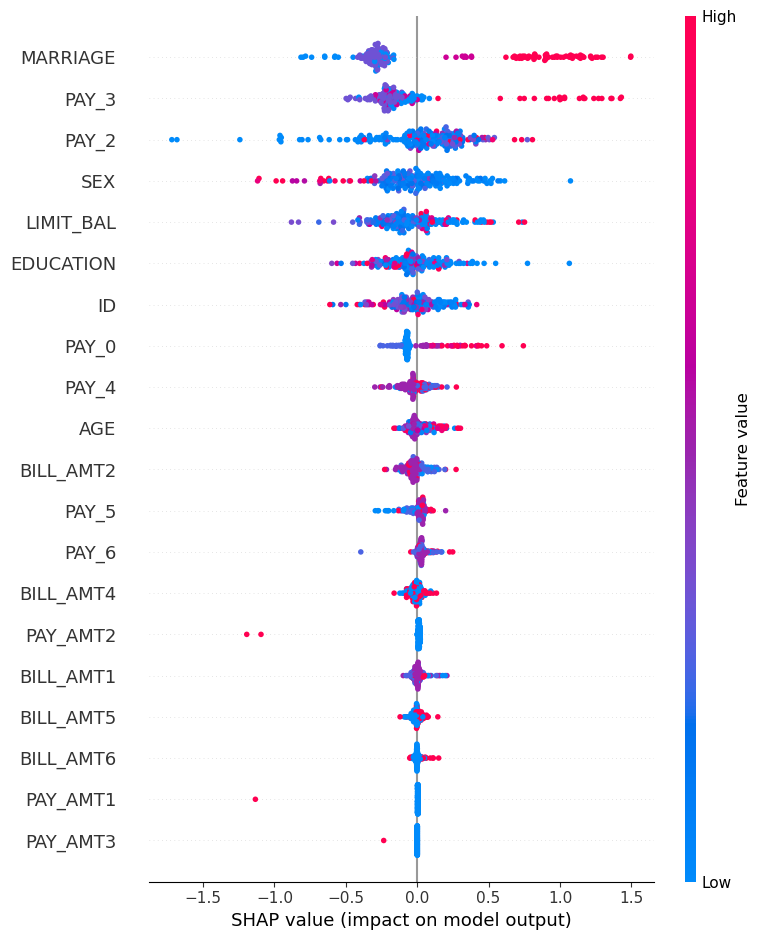

In [40]:
import shap
import numpy

pipeline_lgbm = make_pipeline(
    ct_modified, LGBMClassifier(random_state=123, num_leaves = 60, max_depth = 10, learning_rate = 0.1, n_estimators = 200, verbose=-1)
)
pipeline_lgbm.fit(X_train, y_train)
X_train_transformed = pipeline_lgbm.named_steps['columntransformer'].fit_transform(X_train)

pipeline_lgbm.fit(X_train, y_train)

#TreeExplainer for SHAP
explainer = shap.TreeExplainer(pipeline_lgbm.named_steps['lgbmclassifier'])

# Calculate SHAP values for a subset of the transformed data
shap_values = explainer.shap_values(X_train_transformed[:200])

shap.summary_plot(shap_values, X_train_transformed[:200], feature_names=X_train.columns)

In [41]:
#from sklearn.inspection import permutation_importance

#X_train_transformed = pipe_knn.named_steps['columntransformer'].transform(X_train)

#result = permutation_importance(pipe_knn.named_steps['kneighborsclassifier'],
                                #X_train_transformed, y_train,
                                #scoring='recall', n_repeats=10, random_state=42)

#feature_names = pipe_knn.named_steps['columntransformer'].get_feature_names_out()

#for i in result.importances_mean.argsort()[::-1]:
    #print(f"{feature_names[i]}: {result.importances_mean[i]:.4f} ± {result.importances_std[i]:.4f}")

**Summary of Observations**\
MARRIAGE, PAY_3, PAY_2, SEX, and LIMIT_BAL are the top 5 most influential features.\
High feature values (red) tend to increase the likelihood of default predictions, while low values (blue) push predictions toward non-default.\
The model relies heavily on payment history (PAY_X), marital status, sex, and credit limit.\
Late payments consistently contribute positively to risk (class 1).\
Some features (e.g., ID, BILL_AMT) show very small SHAP values, suggesting low impact on final prediction.
- The `MARRIAGE` feature does not make sense that much that it's at the first influential feature, since demographic features like these are those we found that we can likely frop in feature selection part.
- The `LIMIT_BAL` feature: A significant predictor — higher credit limits are generally associated with lower risk of default.
- Both recent and historical payments (`PAY_x`) and bill amounts (`BILL_AMTx`) contribute variably to predictions, indicating the model captures financial behavior patterns over time.

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

In [44]:
...

Ellipsis

In [45]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Performing model on the test data below, and summary below the code._

In [46]:
pipebest_lgbm = make_pipeline(
    ct_modified, LGBMClassifier(random_state=123, num_leaves = 60, max_depth = 10, learning_rate = 0.1, n_estimators = 200, verbose = -1)
)
pipebest_lgbm.fit(X_train, y_train)

predictions = pipebest_lgbm.predict(X_test)

predictions

array([0, 0, 1, ..., 0, 0, 1])

In [47]:
y_pred_proba = pipebest_lgbm.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.08745469, 0.11552643, 0.53166797, ..., 0.33968315, 0.19129112,
       0.72746957])

In [48]:
from sklearn.metrics import roc_auc_score

data = {
    "accuracy": [],
    "error": [],
    "precision": [],
    "recall": [],
    "f1 score": [],
    "roc-auc score": [],
}
data["accuracy"].append(accuracy_score(y_test, predictions))
data["error"].append(1 - accuracy_score(y_test, predictions))
data["precision"].append(
    precision_score(y_test, predictions, zero_division=1)
)
data["recall"].append(recall_score(y_test, predictions))
data["f1 score"].append(f1_score(y_test, predictions))
data["roc-auc score"].append(roc_auc_score(y_test, predictions))
df = pd.DataFrame(data)
df

,accuracy,error,precision,recall,f1 score,roc-auc score
0,0.812667,0.187333,0.611775,0.36807,0.459615,0.651775


In [49]:
# Scores for validation
scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']
scores = cross_validate(pipebest_lgbm, X_train, y_train, scoring = scoring)
pd.DataFrame(scores).mean()

fit_time          0.407601
score_time        0.062692
test_accuracy     0.812762
test_f1           0.471728
test_precision    0.637273
test_recall       0.374570
test_roc_auc      0.760356
dtype: float64

**Summary**\
Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?
- Yes, the test scores generally agree with the validation scores from before.
- Most scores are very close — a good sign that the model generalizes well. However, ROC-AUC dropped more noticeably. This suggests the model may be overestimating separability during cross-validation — possibly due to class imbalance or slight overfitting to training folds.
- Yes, I trust the results, since the scores are similar.
- The optimization bias is limited because I'm using a separate test set and not just reporting cross-validation results, and I did not run many different models/hyperparameter searches without a truly held-out test set, also, I didn't tune the hyperparameters on the validation data so it reduce the bias happens.

In [50]:
X_train_transformed = ct_modified.fit_transform(X_train)
X_test_transformed = ct_modified.transform(X_test)

In [51]:
def get_feature_names(ct):
    output_features = []

    for name, trans, columns in ct.transformers_:
        if name == 'drop':
            continue
        elif hasattr(trans, 'get_feature_names_out'):
            names = trans.get_feature_names_out(columns)
        elif hasattr(trans, 'named_steps'):
            last_step = trans.named_steps[list(trans.named_steps)[-1]]
            if hasattr(last_step, 'get_feature_names_out'):
                names = last_step.get_feature_names_out(columns)
            else:
                names = columns
        else:
            names = columns
        output_features.extend(names)

    return output_features

column_names = get_feature_names(ct_modified)

X_train_enc = pd.DataFrame(
    data=X_train_transformed,
    columns=column_names,
    index=X_train.index,
)

X_test_enc = pd.DataFrame(
    data=X_test_transformed,
    columns=column_names,
    index=X_test.index,
)
shap.initjs()
ex1_idx = 10
ex2_idx = 68

In [52]:
X_test_enc.iloc[ex1_idx]
y_test.iloc[ex1_idx]
pipebest_lgbm.fit(X_train,y_train)
pipebest_lgbm.predict(X_test)[ex1_idx]
pipebest_lgbm.predict_proba(X_test)[ex1_idx]

array([0.2984973, 0.7015027])

In [53]:
model = pipebest_lgbm.named_steps["lgbmclassifier"]
model.fit(X_train_enc, y_train)
import shap 

explainer = shap.TreeExplainer(model) # define the shap explainer 
train_shap_values = explainer(X_train_enc) # train shap values
test_shap_values = explainer(X_test_enc) # test shap values 

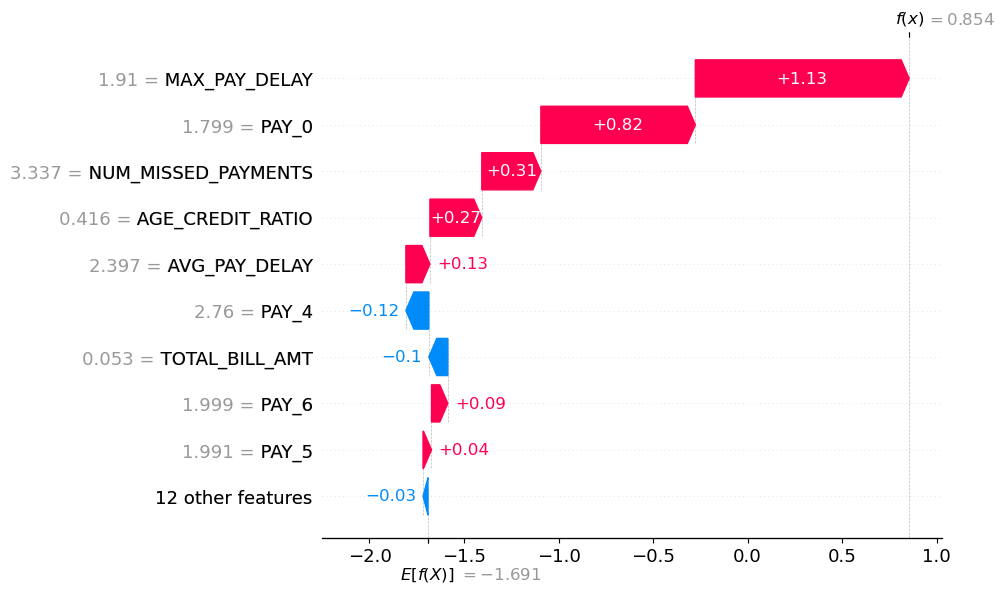

In [54]:
shap.plots.waterfall(test_shap_values[ex1_idx])

In [55]:
shap.force_plot(explainer.expected_value, test_shap_values.values[ex1_idx, :], X_test_enc.iloc[ex1_idx, :])

Based on the SHAP force plot above, we can see the `AVG_PAY_DELAY` are pushing the prediction lower, and are contributing negatively, features like `AGE_CREDIT_RATIO`, `NUM_MISSED_PAYMENTS`, and `MAX_PAY_DELAY` all push the prediction to the negative side. That makes sense because if a client have these features high, they may not get a high credit score and will tend to not make default payment next month.\
The SHAP force plot shows that the model predicts a high probability of default for this individual. This is primarily driven by multiple serious payment delays such as PAY_0, PAY_4, and PAY_6, and a high number of missed payments (NUM_MISSED_PAYMENTS). These features strongly push the prediction toward default. Although AGE_CREDIT_RATIO may offer some stability, its contribution is small compared to the overwhelming signal from missed and delayed payments.

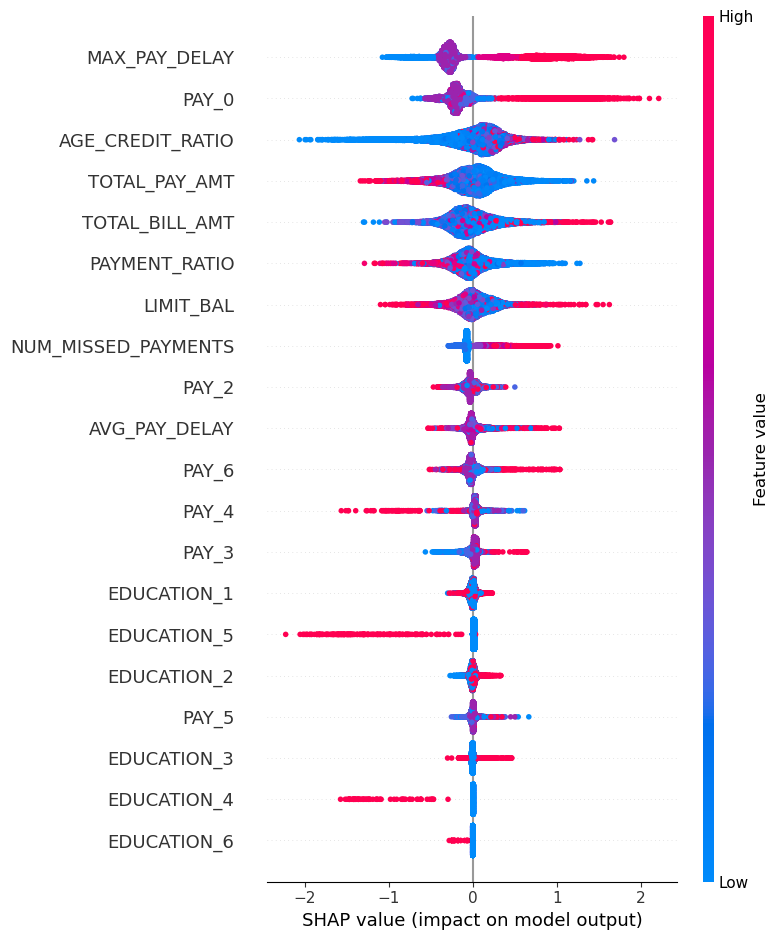

In [56]:
shap.summary_plot(train_shap_values, X_train_enc)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12


| **Model**               | **Train Time (s)** | **Test Time (s)** | **Train Recall** | **Validation Recall** |
| ----------------------- | ------------------ | ----------------- | ---------------- | --------------------- |
| **Random Forest**       | 0.0897 ± 0.0013    | 3.2128 ± 0.0447   | 0.9994 ± 0.0005  | 0.3554 ± 0.0115       |
| **K-Nearest Neighbors** | 0.1518 ± 0.0165    | 0.0185 ± 0.0030   | 0.4868 ± 0.0066  | 0.3750 ± 0.0097       |
| **LightGBM**            | 0.0181 ± 0.0030    | 0.1720 ± 0.0461   | 0.4378 ± 0.0078  | 0.3665 ± 0.0175       |


After testing:
| **Model**                   | **Test Accuracy** | **Test ROC-AUC** | **Test Recall** |
| --------------------------- | ----------------- | ------------ | ----------- |
| Best Model (with LightGBM) | **0.81**          | **0.65**     | **0.36**|

**Concluding Remarks**\
LightGBM shows the best tradeoff between speed and recall. It trains and tests the fastest, while maintaining strong validation recall.

Random Forest has excellent train recall (almost perfect), but much lower validation recall — indicating overfitting.

KNN generalizes slightly better than Random Forest on recall, but suffers from higher train/test times.

**Ideas not tried**
- Feature Selection: My feature selection shows that it do not improve the model that much so maybe we can try SelectKBest or RFE to eliminate noisy or redundant features, which may improve generalization.

- Balance the Class Weights: Since recall is key (catching defaults), and the data may be imbalanced, adjusting class weights could help.

- Hyperparameter Tuning: More extensive tuning (e.g., using  GridSearchCV over more parameters) could refine the results, especially for LightGBM.

- Model selection: I can probably try more models on the data and choose some better ones.

In [57]:
...

Ellipsis

In [58]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

One of the biggest takeaway I've learned is the importance of balancing model performance with interpretability. It’s not always about achieving the highest accuracy—understanding why a model makes its predictions can be just as important, especially in high-stakes domains like healthcare and finance.

For example, models like Random Forests and LightGBM may offer strong predictive performance, but their decisions can be opaque. Tools like SHAP values and feature importance plots allow us to peer into these "black boxes" and gain insights, which is crucial for gaining trust, and ensuring fairness.

Another key realization is that good model performance starts with thoughtful data preprocessing and feature engineering. In many cases, careful handling of missing values, scaling, encoding, and creating informative features can make a bigger difference than choosing between models.

Lastly, I’ve learned that evaluation metrics matter — especially depending on the context. For instance, in imbalanced classification problems, metrics like recall, precision, and F1-score can provide more meaningful insight than accuracy.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)